# KMeans Core 

## Import and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
filename = ('Data/cust_seg.csv')
df = pd.read_csv(filename)

## Explore Data

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


* 850 rows, 10 columns
* Missing data in Defaulted column

In [4]:
ml_df = df.copy()

In [5]:
ml_df.duplicated().sum()

0

* No duplicates found

In [6]:
ml_df.isna().sum()

Unnamed: 0           0
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

Missing 150 from Defaulted column


In [7]:
ml_df['Defaulted'].value_counts()
# Will impute with mode as column is binary

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [8]:
ml_df.describe(include='number')

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,0.00000,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,212.25000,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,424.50000,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,636.75000,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,849.00000,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [9]:
ml_df.drop(columns =['Unnamed: 0', 'Customer Id'], axis=1, inplace=True)
## Why isn't this working?? 

In [10]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


## Missing Data

In [11]:
ml_df['Defaulted'] = ml_df['Defaulted'].fillna(df['Defaulted'].mode()[0])

#https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

In [12]:
ml_df.isna().sum(0)

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [18]:
ml_df['Defaulted'].value_counts ()

0.0    667
1.0    183
Name: Defaulted, dtype: int64

## Scaling, KMeans and Inertia

In [14]:
# Instantiate Scaler
scaler = StandardScaler()

scaled_df = scaler.fit_transform(ml_df)

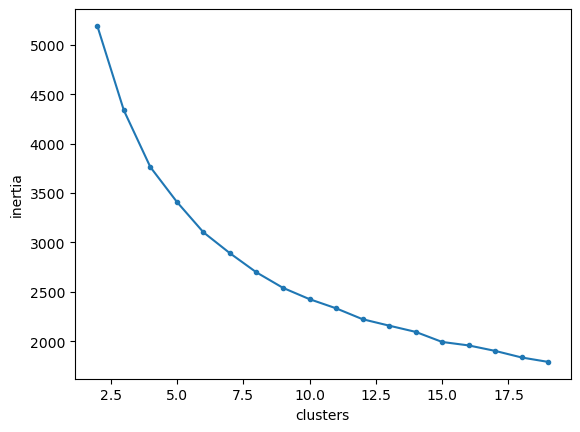

In [20]:
# Create an empty list of inertias

inertias = []

# Loop through K values between  and  and store the inertias in the list

for k in range (2,20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)

# Visualize scores

plt.plot(range(2,20), inertias, marker = '.');
plt.xlabel('clusters');
plt.ylabel('inertia');

*Elbow around 7

## Silhouette Scores

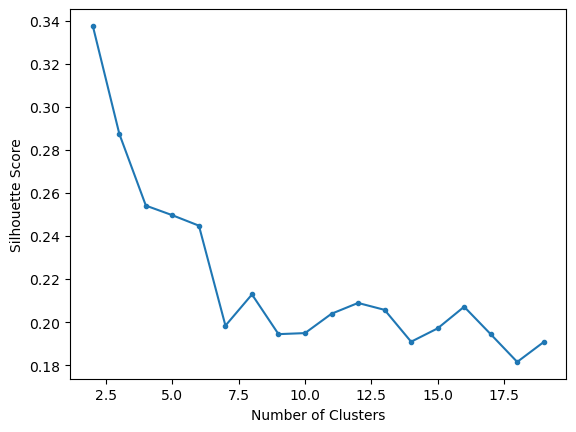

In [21]:
# Empty List    # Tried km.labels_ 

silhouette_scores = []

# For loop

for i in range(2,20):
    kmeans = KMeans(n_clusters =i)
    kmeans.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df,kmeans.labels_))
    
# Visualize scores
plt.plot(range(2,20), silhouette_scores, marker = '.');
plt.xlabel('Number of Clusters');
plt.ylabel('Silhouette Score');

In [24]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)
# This is a really bad score

0.34248044225007934